In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/works/client-project/stock-inventory-business-case/project-group.zip (Unzipped Files)

/content/drive/MyDrive/works/client-project/stock-inventory-business-case/project-group.zip (Unzipped Files)


# Approach 1:
Build a multi-class classifier model for top 7 classes.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('data_top7_class.csv')
data

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text,job_card_date_dt
0,01-06-17,01-06-17,SATHXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR 150,523,CHAIN LUBRICATION,2017-01-06
1,01-06-17,01-06-17,vinoXXXXXXXXXX,KA51EVXXXX,BAJAJ AVENGER STREET 220,2750,CHAIN LUBRICATION,2017-01-06
2,01-06-17,01-06-17,diliXXXXXXXXXX,ka 53 XXXX,BAJAJ V,45421,GENERAL SERVICE,2017-01-06
3,01-06-17,01-06-17,SATHXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR 150,523,3M OIL,2017-01-06
4,01-06-17,01-06-17,PRASXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5500,3M OIL,2017-01-06
...,...,...,...,...,...,...,...,...
15563,06-01-19,06-01-19,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,GENERAL SERVICE,2019-06-01
15564,06-01-19,06-01-19,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,CHAIN LUBRICATION,2019-06-01
15565,06-01-19,06-01-19,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,ENGINE OIL,2019-06-01
15566,06-01-19,06-01-19,PRITXXXXXXXXXX,KA53EWXXXX,BAJAJ PULSAR NS 160,2914,POLISH,2019-06-01


In [ ]:
data.drop(['invoice_date', 'job_card_date', 'job_card_date_dt'], axis=1, inplace=True)
data

,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,SATHXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR 150,523,CHAIN LUBRICATION
1,vinoXXXXXXXXXX,KA51EVXXXX,BAJAJ AVENGER STREET 220,2750,CHAIN LUBRICATION
2,diliXXXXXXXXXX,ka 53 XXXX,BAJAJ V,45421,GENERAL SERVICE
3,SATHXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR 150,523,3M OIL
4,PRASXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5500,3M OIL
...,...,...,...,...,...
15563,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,GENERAL SERVICE
15564,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,CHAIN LUBRICATION
15565,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,ENGINE OIL
15566,PRITXXXXXXXXXX,KA53EWXXXX,BAJAJ PULSAR NS 160,2914,POLISH


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15568 entries, 0 to 15567
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   business_partner_name  15568 non-null  object
 1   vehicle_no             15568 non-null  object
 2   vehicle_model          15568 non-null  object
 3   current_km_reading     15568 non-null  int64 
 4   invoice_line_text      15568 non-null  object
dtypes: int64(1), object(4)
memory usage: 608.2+ KB


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
data.nunique()

business_partner_name     981
vehicle_no                804
vehicle_model              28
current_km_reading       3396
invoice_line_text           7
dtype: int64

In [ ]:
data.describe()

,current_km_reading
count,15568.000000
mean,13871.119090
std,21751.962074
min,0.000000
25%,1796.000000
50%,6512.000000
75%,19164.250000
max,610112.000000


## Data preprocessing

We will try to minimize number of feature values for 'business_partner_name' and 'vehicle_no' because of its number of unique values are high. Using entire values will results poor training on data. 

For feature **'business_partner_name'**, we will take top 20 values and rest values will label as 'other'.  

In [ ]:
data.business_partner_name.value_counts()[:20]

venkXXXXXXXXXX    222
manjXXXXXXXXXX    205
prasXXXXXXXXXX    177
santXXXXXXXXXX    164
hariXXXXXXXXXX    159
shivXXXXXXXXXX    155
raviXXXXXXXXXX    154
chanXXXXXXXXXX    141
sureXXXXXXXXXX    131
vijaXXXXXXXXXX    128
abhiXXXXXXXXXX    122
arunXXXXXXXXXX    121
mohaXXXXXXXXXX    120
srinXXXXXXXXXX    110
rameXXXXXXXXXX    108
ramaXXXXXXXXXX    108
kartXXXXXXXXXX    107
balaXXXXXXXXXX    104
vinoXXXXXXXXXX    101
anilXXXXXXXXXX    100
Name: business_partner_name, dtype: int64

In [ ]:
top_20_business_partner_name = ['venkXXXXXXXXXX', 'manjXXXXXXXXXX', 'prasXXXXXXXXXX', 'santXXXXXXXXXX', 
                                 'hariXXXXXXXXXX', 'shivXXXXXXXXXX', 'raviXXXXXXXXXX', 'chanXXXXXXXXXX',
                                 'sureXXXXXXXXXX', 'vijaXXXXXXXXXX', 'abhiXXXXXXXXXX', 'arunXXXXXXXXXX',
                                 'mohaXXXXXXXXXX', 'srinXXXXXXXXXX', 'rameXXXXXXXXXX', 'ramaXXXXXXXXXX', 
                                 'kartXXXXXXXXXX', 'balaXXXXXXXXXX', 'vinoXXXXXXXXXX', 'anilXXXXXXXXXX']

In [ ]:
data.loc[data.business_partner_name.isin(top_20_business_partner_name)==False, ['business_partner_name']] = 'other'

In [ ]:
data.loc[data.business_partner_name.isin(top_20_business_partner_name)==False, ['business_partner_name']]

,business_partner_name
0,other
2,other
3,other
4,other
5,other
...,...
15563,other
15564,other
15565,other
15566,other


In [ ]:
data.business_partner_name.value_counts()

other             12831
venkXXXXXXXXXX      222
manjXXXXXXXXXX      205
prasXXXXXXXXXX      177
santXXXXXXXXXX      164
hariXXXXXXXXXX      159
shivXXXXXXXXXX      155
raviXXXXXXXXXX      154
chanXXXXXXXXXX      141
sureXXXXXXXXXX      131
vijaXXXXXXXXXX      128
abhiXXXXXXXXXX      122
arunXXXXXXXXXX      121
mohaXXXXXXXXXX      120
srinXXXXXXXXXX      110
ramaXXXXXXXXXX      108
rameXXXXXXXXXX      108
kartXXXXXXXXXX      107
balaXXXXXXXXXX      104
vinoXXXXXXXXXX      101
anilXXXXXXXXXX      100
Name: business_partner_name, dtype: int64

For **'vehicle_no'** feature, we first encode values into respective Indian States number code. This is dome by just taking first two letters for all vehicle_no rows as we know first two letter stands for Indian state in which the vehicle belongs to.

In [ ]:
data.vehicle_no.unique()

array(['KA53ESXXXX', 'KA51EVXXXX', 'ka 53 XXXX', 'KA53ERXXXX',
       'KA53EQXXXX', 'KA02EWXXXX', 'KA03JJXXXX', 'KA44K6XXXX',
       'KA53S9XXXX', 'KA53V3XXXX', 'KA53ENXXXX', 'KA53EGXXXX',
       'KA03TCXXXX', 'KA53L8XXXX', 'KA03HWXXXX', 'KA01HJXXXX',
       'KA51EUXXXX', 'KA53ELXXXX', 'KA03HFXXXX', 'KA01HLXXXX',
       'KA53EPXXXX', 'KA53ETXXXX', 'AP36ARXXXX', 'KA19EHXXXX',
       'KA01HGXXXX', 'KA03HUXXXX', 'KA53Y3XXXX', 'AP28DUXXXX',
       'AP11AJXXXX', 'KA53EUXXXX', 'KA53EMXXXX', 'KL49G5XXXX',
       'KA53R7XXXX', 'AP02AAXXXX', 'SHIVAMXXXX', 'KA01HRXXXX',
       'KA53EVXXXX', 'KA02HAXXXX', 'KA01HTXXXX', 'KA03HZXXXX',
       'TN29ARXXXX', 'KA53EFXXXX', 'JOGANNXXXX', 'KA21W8XXXX',
       'KA53EKXXXX', 'KA06EUXXXX', 'KA53EBXXXX', 'AP28DJXXXX',
       'AP30AKXXXX', 'KA53EJXXXX', 'KA03HSXXXX', 'KA01HMXXXX',
       'KA53X6XXXX', 'KA02EJXXXX', 'KL9AH4XXXX', 'RJ44SAXXXX',
       'KA03HJXXXX', 'KA03JGXXXX', 'KA53S3XXXX', 'KA03JDXXXX',
       'KA05HXXXXX', 'KA03JMXXXX', 'KA03HMXXXX', 'KA53W

In [ ]:
for row in data.vehicle_no:
  data.vehicle_no.replace(row, row[:2], inplace=True)

In [ ]:
data.vehicle_no.replace('ka', 'KA', inplace=True)

In [ ]:
data

,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,other,KA,BAJAJ PULSAR 150,523,CHAIN LUBRICATION
1,vinoXXXXXXXXXX,KA,BAJAJ AVENGER STREET 220,2750,CHAIN LUBRICATION
2,other,KA,BAJAJ V,45421,GENERAL SERVICE
3,other,KA,BAJAJ PULSAR 150,523,3M OIL
4,other,KA,BAJAJ PULSAR 150,5500,3M OIL
...,...,...,...,...,...
15563,other,KA,BAJAJ PULSAR 150,91448,GENERAL SERVICE
15564,other,KA,BAJAJ PULSAR 150,91448,CHAIN LUBRICATION
15565,other,KA,BAJAJ PULSAR 150,91448,ENGINE OIL
15566,other,KA,BAJAJ PULSAR NS 160,2914,POLISH


Now, similarly for feature **'vehicle_no'** also, we will take top 30 values that has more repeated and rest categorized as 'other'.

In [ ]:
data.vehicle_no.nunique()

80

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
top_30_vehicle_no = ['KA', 'AP', 'TN', 'MH', 'TS', 'KL', 'DL', 'NE', 'MA', 'CH', 'VE', 'SU', 'SH', 'UP', 
                     'MU', 'MP', 'RA', 'RJ', 'UK', 'NA', 'HR', 'FO', 'VI', 'AN', 'PY', 'OD', 'SA', 'PR', 'OR', 'BA']

In [ ]:
data.loc[data.vehicle_no.isin(top_30_vehicle_no)==False, ['vehicle_no']] = 'other'

In [ ]:
data.vehicle_no.value_counts()

KA       13878
AP         304
other      286
TN         266
MH         191
TS          89
KL          73
DL          37
NE          36
CH          34
MA          34
SU          25
VE          25
SH          24
UP          23
MU          22
MP          22
RJ          19
RA          19
UK          19
NA          18
HR          17
FO          15
VI          14
PY          13
AN          13
SA          11
OD          11
BA          10
PR          10
OR          10
Name: vehicle_no, dtype: int64

In [ ]:
data

,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,other,KA,BAJAJ PULSAR 150,523,CHAIN LUBRICATION
1,vinoXXXXXXXXXX,KA,BAJAJ AVENGER STREET 220,2750,CHAIN LUBRICATION
2,other,KA,BAJAJ V,45421,GENERAL SERVICE
3,other,KA,BAJAJ PULSAR 150,523,3M OIL
4,other,KA,BAJAJ PULSAR 150,5500,3M OIL
...,...,...,...,...,...
15563,other,KA,BAJAJ PULSAR 150,91448,GENERAL SERVICE
15564,other,KA,BAJAJ PULSAR 150,91448,CHAIN LUBRICATION
15565,other,KA,BAJAJ PULSAR 150,91448,ENGINE OIL
15566,other,KA,BAJAJ PULSAR NS 160,2914,POLISH


Now we will apply LabelEncoder to categorical features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
en_partner_name = LabelEncoder()
data['business_partner_name'] = en_partner_name.fit_transform(data['business_partner_name'])

In [ ]:
en_vehicle_no = LabelEncoder()
data['vehicle_no'] = en_vehicle_no.fit_transform(data['vehicle_no'])

In [ ]:
en_vehicle_model = LabelEncoder()
data['vehicle_model'] = en_vehicle_model.fit_transform(data['vehicle_model'])

In [ ]:
en_invoice_line_text = LabelEncoder()
data['invoice_line_text'] = en_invoice_line_text.fit_transform(data['invoice_line_text'])

In [ ]:
data.head()

,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,9,7,12,523,2
1,20,7,2,2750,2
2,9,7,20,45421,5
3,9,7,12,523,0
4,9,7,12,5500,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15568 entries, 0 to 15567
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   business_partner_name  15568 non-null  int32
 1   vehicle_no             15568 non-null  int32
 2   vehicle_model          15568 non-null  int32
 3   current_km_reading     15568 non-null  int64
 4   invoice_line_text      15568 non-null  int32
dtypes: int32(4), int64(1)
memory usage: 365.0 KB


In [ ]:
data.nunique()

business_partner_name      21
vehicle_no                 31
vehicle_model              28
current_km_reading       3396
invoice_line_text           7
dtype: int64

In [ ]:
data.business_partner_name.value_counts()

9     12831
18      222
7       205
10      177
14      164
5       159
15      155
13      154
4       141
17      131
19      128
0       122
2       121
8       120
16      110
11      108
12      108
6       107
3       104
20      101
1       100
Name: business_partner_name, dtype: int64

In [ ]:
data.vehicle_no.value_counts()

7     13878
1       304
30      286
24      266
10      191
25       89
8        73
4        37
14       36
3        34
9        34
23       25
28       25
22       24
27       23
12       22
11       22
20       19
19       19
26       19
13       18
6        17
5        15
29       14
18       13
0        13
21       11
15       11
2        10
17       10
16       10
Name: vehicle_no, dtype: int64

## Analysing features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


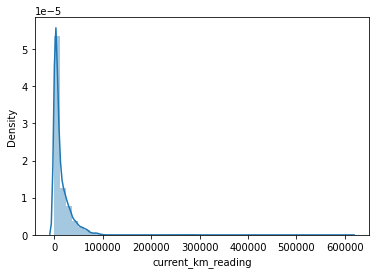

In [ ]:
sb.distplot(data.current_km_reading)
plt.show()

In [ ]:
cat_num_feat = ['business_partner_name', 'vehicle_no', 'vehicle_model']

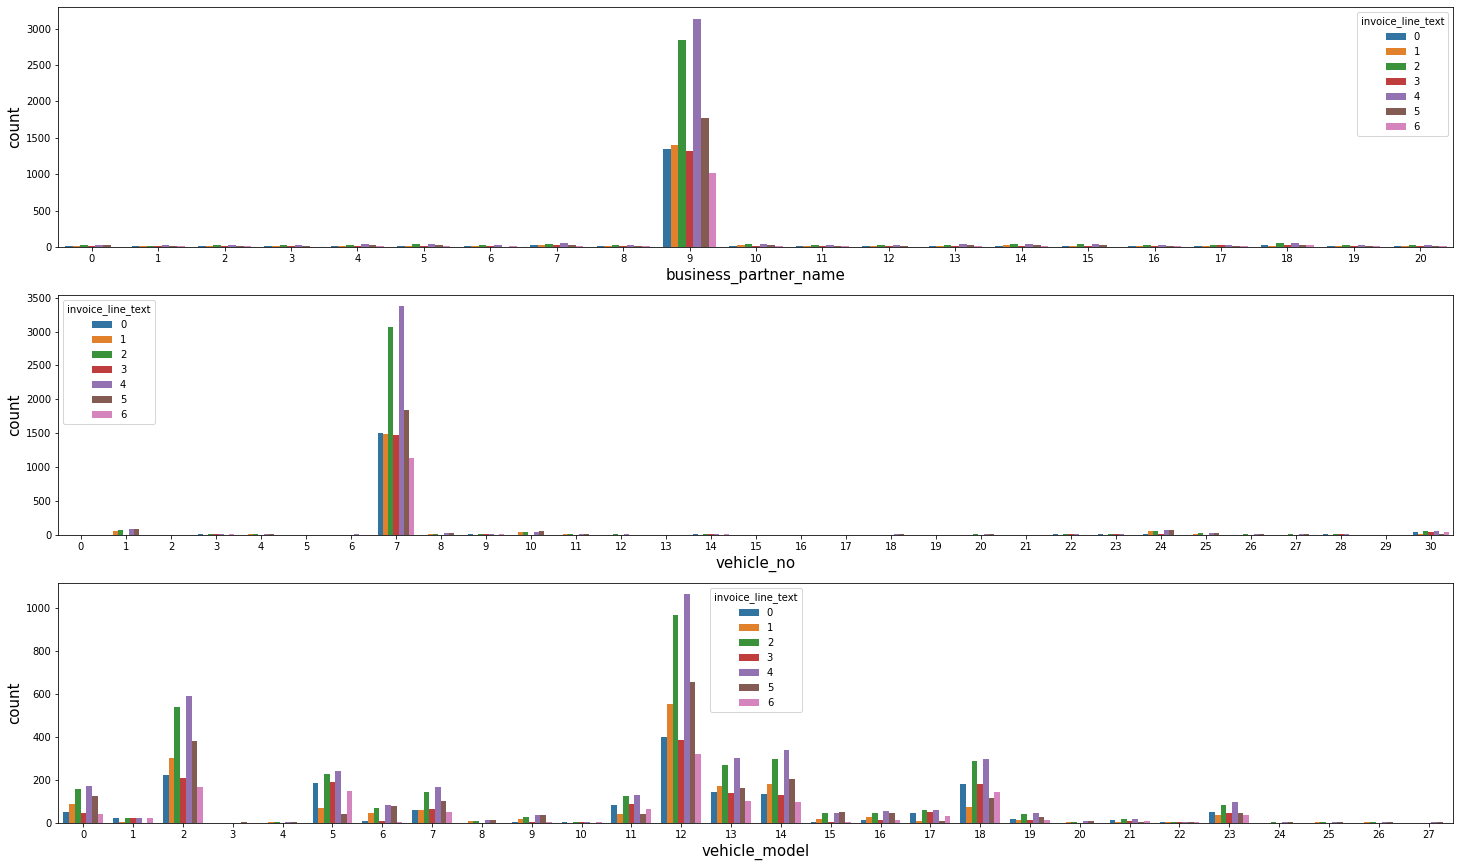

In [ ]:
plt.figure(figsize=(25, 15))
plt_num=1
for feat in cat_num_feat:
  if plt_num<=len(cat_num_feat):
    plt.subplot(3, 1, plt_num)
    sb.countplot(x=feat, hue='invoice_line_text', data=data)
    plt.xlabel(feat, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt_num+=1
plt.show()

From the first two plots, most of vehicle spare-parts are associated with a specific 'business_partner_name' and 'vehicle_no'.

In [ ]:
data.corr()

,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
business_partner_name,1.000000,0.011490,0.030687,0.004347,-0.005810
vehicle_no,0.011490,1.000000,-0.026666,-0.026213,0.004931
vehicle_model,0.030687,-0.026666,1.000000,-0.002377,-0.003044
current_km_reading,0.004347,-0.026213,-0.002377,1.000000,0.067835
invoice_line_text,-0.005810,0.004931,-0.003044,0.067835,1.000000


It is noticable that correlation between input and output variable is very low. 

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

In [ ]:
X = data.iloc[:, :-1]
y = data.invoice_line_text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=True, stratify=y)

In [ ]:
y_train.value_counts(normalize=True)*100

4    24.421147
2    22.105737
5    13.757396
1    11.017494
0    10.457937
3    10.245691
6     7.994597
Name: invoice_line_text, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)*100

4    25.0
2    20.0
5    15.0
0    10.0
6    10.0
1    10.0
3    10.0
Name: invoice_line_text, dtype: float64

In [ ]:
print(Counter(y_train))

Counter({4: 3797, 2: 3437, 5: 2139, 1: 1713, 0: 1626, 3: 1593, 6: 1243})


In [ ]:
## Oversampling of train data

oversample = SMOTE()
X_train_smt, y_train_smt = oversample.fit_resample(X_train, y_train)

In [ ]:
print(Counter(y_train_smt))

Counter({6: 3797, 4: 3797, 5: 3797, 0: 3797, 2: 3797, 3: 3797, 1: 3797})


In [ ]:
## Standardizing of input features

sc = StandardScaler()
X_train_smt_sc = sc.fit_transform(X_train_smt)

In [ ]:
X_train_smt_sc

array([[-0.08009355, -0.21266849, -1.50778123, -0.24417682],
       [-0.08009355, -0.21266849,  0.33387302, -0.18192583],
       [-0.08009355, -0.21266849,  1.99136185, -0.57394396],
       ...,
       [-0.50239198, -0.21266849,  0.33387302, -0.56176233],
       [-0.08009355, -0.21266849,  0.70220387, -0.41903589],
       [-1.34698886,  0.26201372,  1.43886557, -0.57567049]])

In [ ]:
X_test_sc = sc.transform(X_test)

### Trying with Sklearn and ensemble algorithms

In [ ]:
models = []

models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVC',SVC()))
models.append(('GNB',GaussianNB()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('BC',BaggingClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('XGBC',XGBClassifier()))
models.append(('MLPC',MLPClassifier()))

In [ ]:
def train_test_model(model, X_train, y_train, X_test, y_test, score=None):
  model_trained = model.fit(X_train, y_train)
  train_score = model_trained.score(X_train, y_train)
  y_pred = model_trained.predict(X_test)
  test_score = model_trained.score(X_test, y_test)
  acc_score = accuracy_score(y_test, y_pred)
  return train_score, test_score, acc_score

In [ ]:
## single passing of dataset on all models

for name, model in models:
  print(train_test_model(model, X_train_smt_sc, y_train_smt, X_test_sc, y_test, None))

(0.2486549531585086, 0.2, 0.2)
(0.39813386508145526, 0.05, 0.05)
(0.2814628089845367, 0.25, 0.25)
(0.23793220211445126, 0.15, 0.15)
(0.5326009255427216, 0.0, 0.0)
(0.5219157981865382, 0.0, 0.0)
(0.5325633018548478, 0.0, 0.0)
(0.27239550020693026, 0.2, 0.2)
(0.3148726438165469, 0.1, 0.1)


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(0.39798337032995973, 0.05, 0.05)
(0.2820647879905188, 0.15, 0.15)


In [ ]:
def selecting_pipeline(model, std_scaling, smot_balancing):
  if std_scaling==False and smot_balancing==False:
    pipeline = Pipeline(steps=[['model', model]])
  elif std_scaling==False and smot_balancing==True:
    pipeline = imbpipeline(steps=[['smote', SMOTE()],
                                  ['model', model]])
  elif std_scaling==True and smot_balancing==False:
    pipeline = Pipeline(steps=[['scaler', StandardScaler()],
                               ['model', model]])
  elif std_scaling==True and smot_balancing==True:
    pipeline = imbpipeline(steps=[['smote', SMOTE()],
                                  ['scaler', StandardScaler()],
                                  ['model', model]])
  return pipeline

def selecting_model(X, y, score, std_scaling=False, smot_balancing=False):
  names=[]
  results=[]
  msgs = []
  for name, model in models:
    pipeline = selecting_pipeline(model, std_scaling, smot_balancing)
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    cv_result = cross_val_score(pipeline, X, y, scoring=score, cv=kfold)
    names.append(name)
    results.append(cv_result)
    msg = '%s: %f (%f)'%(name, cv_result.mean(), cv_result.std())
    msgs.append(msg)
  return msgs

In [ ]:
## Applying 'recall_macro' metrics with cross validation
msgs = selecting_model(X, y, 'recall_macro', std_scaling=True, smot_balancing=True)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
msgs

['LR: 0.238462 (0.005722)',
 'KNN: 0.050297 (0.002495)',
 'SVC: 0.242155 (0.008386)',
 'GNB: 0.224984 (0.004826)',
 'DT: 0.007934 (0.000486)',
 'BC: 0.011735 (0.003041)',
 'RF: 0.008064 (0.001910)',
 'ABC: 0.252924 (0.005603)',
 'GBC: 0.197584 (0.006899)',
 'XGBC: 0.093522 (0.005048)',
 'MLPC: 0.243848 (0.008870)']

In [ ]:
## Applying 'accuracy' metrics with cross validation
msgs = selecting_model(X, y, 'accuracy', std_scaling=True, smot_balancing=False)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
msgs

['LR: 0.234969 (0.004036)',
 'KNN: 0.043551 (0.001950)',
 'SVC: 0.234006 (0.004580)',
 'GNB: 0.216855 (0.003552)',
 'DT: 0.005588 (0.001445)',
 'BC: 0.008158 (0.001294)',
 'RF: 0.008993 (0.002000)',
 'ABC: 0.234455 (0.005149)',
 'GBC: 0.151658 (0.003207)',
 'XGBC: 0.056398 (0.003096)',
 'MLPC: 0.220517 (0.003517)']

### Trying with ANN

In [ ]:
y_train_smt = y_train_smt.to_numpy()

In [ ]:
y_train_smt

array([6, 4, 4, ..., 6, 6, 6])

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(7, activation='softmax'))

In [ ]:
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
y_train_smt.shape

(26579,)

In [ ]:
## Converting each output value into one-hot vectors.

y_train_oht = tf.keras.utils.to_categorical(y_train_smt)
y_test_oht = tf.keras.utils.to_categorical(y_test)
y_train_oht.shape

(26579, 7)

In [ ]:
ann_hist = ann.fit(X_train_smt_sc, y_train_oht, epochs=50, validation_split=0.20)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
646/665 [============================>.] - ETA: 0s - loss: 1.6817 - accuracy: 0.2867WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000023B70097B88> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

In [ ]:
ann_hist.history['val_accuracy'][-1]

0.006019563414156437

ANN model not at all performing on this dataset.

### Findings
In this approach, we have done modelling with different preprocessing techiniques on categorical features in order to get better model.
- Method 1: Model trained on data having categorical features with whole classes, just encoded with LabelEncoder without minimizing categorical values. Uses different classification algorithms and ANN model. But model performance is very low; maximum of recall score is 0.25. (This is done on this same notebook before these scripts)
- Method 2: Model trained on data having categorical features with selected values (reduced the number of unique values). Taken top most repeated values and other taken as separate class named 'other'. Then encoded using LabelEncoder. Uses different classification algorithms and ANN model. But model performance is same as Methode 1, not much improvement in performance.

# Conclusion
In Approach 1, models created are very poor in performance. May be data is not good enough for this approach also we had seen from Pearson's correlation very small coefficient values. Next we will try with Approach 2.